In [2]:
import zarr
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from global_land_mask import globe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import scipy
import datetime

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import Image

mpl.rcParams['figure.dpi']= 150
plt.rcParams.update({'font.size': 8})
mpl.rcParams['axes.linewidth'] = 0.3
g = 9.80616 #Avg. gravity acceleration on Earth

# New custom colormap
magma_cmap = plt.cm.magma_r
magma_cmap.set_under('white')

In [3]:
dataset = xr.open_dataset('/Users/rm65238/Downloads/graphcast_operational_2025_07_02_00.nc')
ds = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    consolidated=True,
    storage_options={'token': 'anon'}
)

In [37]:
dataset2 = xr.open_dataset('/Users/rm65238/Downloads/graphcast_operational_2025_07_01_00.nc')

In [ ]:
# Texas
lat1, lat2 = 37, 25.5
lon1, lon2 = 253, 270

In [39]:
# convert m/6h to mm/day
subset = 24*1000*dataset.sel(lat=slice(lat2, lat1), lon=slice(lon1, lon2), time=slice('2025-07-02', '2025-07-07'))/6
subset2 = 24*1000*dataset2.sel(lat=slice(lat2, lat1), lon=slice(lon1, lon2), time=slice('2025-07-01', '2025-07-07'))/6

In [32]:
l=[]
for i in subset.lon:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, subset.lat)
mask1 = globe.is_land(lat_grid, lon_grid)

In [33]:

subset1 = 86400*ds.mean_total_precipitation_rate.sel(latitude=slice(lat1, lat2), longitude=slice(lon1, lon2), time=slice('2025-07-01', '2025-07-07'))

In [34]:
l=[]
for i in subset1.longitude:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, subset1.latitude)
mask2 = globe.is_land(lat_grid, lon_grid)

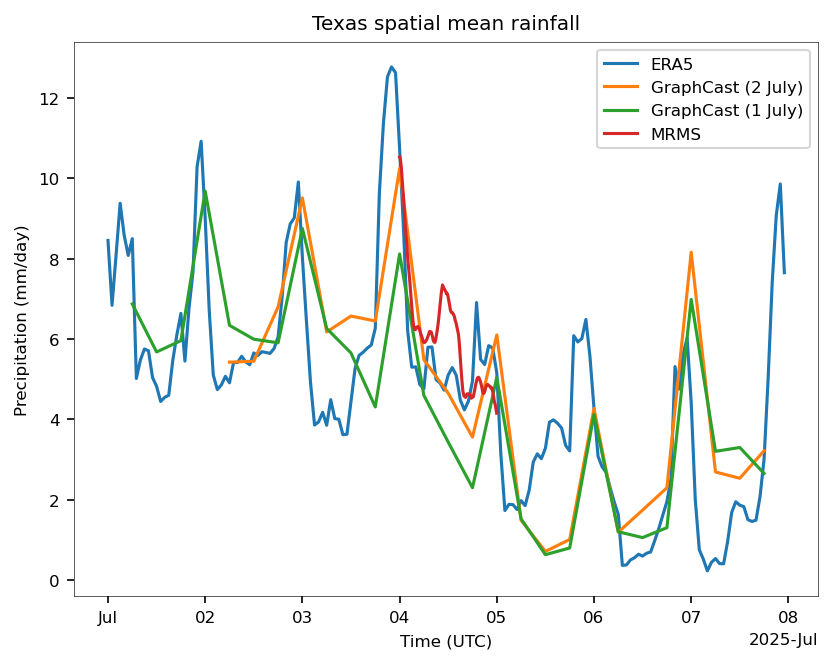

In [95]:
subset1.where(mask2>0).mean(dim=['latitude', 'longitude']).plot(label='ERA5')
subset.tp06.where(mask1>0).mean(dim=['lat', 'lon']).plot(label='GraphCast (2 July)')
subset2.tp06.where(mask1>0).mean(dim=['lat', 'lon']).plot(label='GraphCast (1 July)')
mrms_sel.unknown.where(mask3>0).mean(dim=['latitude', 'longitude']).plot(label='MRMS')
plt.legend()
plt.xlabel('Time (UTC)')
plt.ylabel('Precipitation (mm/day)')
plt.title('Texas spatial mean rainfall')
plt.show()

In [93]:
file_path = '/Users/rm65238/Documents/Work/MRMS texas/MRMS_RadarOnly_QPE_01H_00.00_20250704-*.grib2'
mrms = xr.open_mfdataset(file_path, engine='cfgrib', combine='nested', concat_dim='valid_time', parallel=True)
mrms_sel = 24*mrms.sel(latitude=slice(lat1, lat2), longitude=slice(lon1, lon2))

In [94]:
mrms_sel = xr.where(mrms_sel < 0, 0, mrms_sel)

In [89]:
l=[]
for i in mrms_sel.longitude:
    if i>180:
        l.append(i-360)
    else:
        l.append(i)
            
lon_grid, lat_grid = np.meshgrid(l, mrms_sel.latitude)
mask3 = globe.is_land(lat_grid, lon_grid)

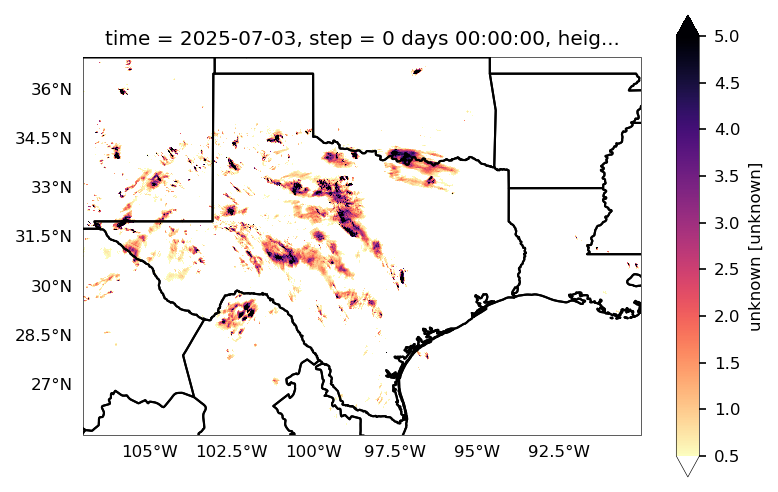

In [66]:
# Setup plot
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False

current_plot = [mrms_sel.unknown.plot(cmap=magma_cmap,
    transform=ccrs.PlateCarree(), vmin=0.5, vmax=5)]

In [31]:
subset = 86400*dataset.sel(lat=slice(lat2, lat1), lon=slice(lon1, lon2)).isel(time=10)/6

In [25]:
subset = dataset.isel(time=10)

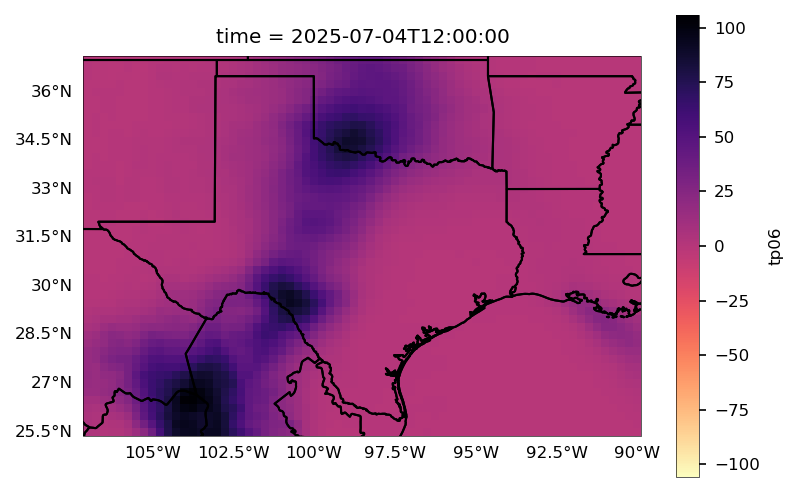

In [32]:
# Setup plot
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cfeature.STATES, edgecolor='black', zorder=10)

gls = ax.gridlines(draw_labels=True, color='none')
gls.top_labels = False
gls.right_labels = False

current_plot = [subset.tp06.plot(cmap=magma_cmap,
    transform=ccrs.PlateCarree())]

In [74]:
import xarray as xr
import fsspec

# File URL (you can change this to other dates)
url = 'https://pds-imerg.s3.amazonaws.com/3IMERGDF.07/2025/181/3IMERGDF.07_20250630.nc4'

# Open the file directly via fsspec using xarray
fs = fsspec.filesystem('s3', anon=True)
with fs.open(url) as f:
    ds = xr.open_dataset(f, engine='netcdf4')

ParamValidationError: Parameter validation failed:
Invalid bucket name "https:": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]*:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-.]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"